In [1]:
import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
import time
import timeit

In [2]:
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(precision=3, suppress = True)

In [3]:
df = pd.read_csv("Clean_FIPS_Counties.csv")

In [4]:
df.drop(df.columns[0], axis=1, inplace=True)

# SAVE SOME GLOBAL VARIABLES
DF_COL_NAMES = df.columns

FIPS = df['FIPS']
STATE = df["State"]
COUNTY = df["County"]

df.drop(["State", "County"], axis=1, inplace=True)

df.head()

,FIPS,% Fair/Poor,Physically Unhealthy Days,Mentally Unhealthy Days,% LBW,% Smokers,% Obese,Food Environment Index,% Physically Inactive,% With Access,...,% Single-Parent Households,Association Rate,Violent Crime Rate,Injury Death Rate,% Severe Housing Problems,% Drive Alone,% Long Commute - Drives Alone,Dentists per person,PCPs per person,MHPs per person
0,1001,0.110673,0.389001,0.599601,-0.046100,0.308750,1.277396,-0.229372,1.012940,0.264421,...,-0.701569,-0.167723,0.124956,-0.458848,0.162827,0.844024,0.564013,0.023396,-0.110643,1.684748
1,1003,0.110673,0.249076,0.436841,-0.046100,-0.236706,-0.244628,0.458913,-0.338015,0.394420,...,-0.701569,-0.436956,-0.236368,-0.645707,-0.050697,0.713715,0.805931,-0.426932,-0.545341,-0.352851
2,1005,1.810044,1.648322,1.087881,1.410135,1.126935,2.581988,-1.605941,0.433959,-0.385571,...,2.334699,-0.748698,0.879485,-0.496219,0.162827,0.453096,0.241456,-0.091901,-0.031836,4.283682
3,1007,0.535516,0.668850,0.599601,1.410135,0.581479,1.277396,0.114771,1.784914,-2.032219,...,-0.227152,-0.507806,-0.847430,0.512824,-0.691268,0.844024,1.451046,0.313310,-0.390241,3.760922
4,1009,0.747937,0.808775,1.250641,-0.046100,0.581479,0.407668,0.889091,0.626953,-1.728889,...,-0.227152,-0.677848,1.246122,0.699684,-0.904792,0.974333,2.338078,0.754448,0.740308,3.091901


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2936 entries, 0 to 2935
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FIPS                           2936 non-null   int64  
 1   % Fair/Poor                    2936 non-null   float64
 2   Physically Unhealthy Days      2936 non-null   float64
 3   Mentally Unhealthy Days        2936 non-null   float64
 4   % LBW                          2936 non-null   float64
 5   % Smokers                      2936 non-null   float64
 6   % Obese                        2936 non-null   float64
 7   Food Environment Index         2936 non-null   float64
 8   % Physically Inactive          2936 non-null   float64
 9   % With Access                  2936 non-null   float64
 10  % Excessive Drinking           2936 non-null   float64
 11  % Alcohol-Impaired             2936 non-null   float64
 12  Chlamydia Rate                 2936 non-null   f

In [6]:
df2 = df.drop("FIPS", axis=1)

start_time = time.time()
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
X_reduced_PCA = pca.fit_transform(df2)
features_PC_inv = pca.inverse_transform(X_reduced_PCA)
print(features_PC_inv[0:2])
end_time = time.time()
print("Total run time = %.3f seconds" %(end_time - start_time))

[[ 0.131  0.332  0.526 -0.08   0.457  1.216 -0.156  1.029  0.263 -0.194
  -0.03  -0.093 -0.502 -0.413 -0.424 -0.432 -0.784  0.943  0.519  0.047
   0.232  0.003  0.222 -0.394 -0.253  0.121 -0.692 -0.185  0.129 -0.44
   0.092  0.861  0.517  0.015 -0.173  1.701]
 [-0.048  0.197  0.366 -0.096 -0.061 -0.4    0.594 -0.192  0.39  -0.211
   0.168 -0.05  -0.306 -0.015  0.41   0.156 -0.283 -0.545  0.625  0.457
  -0.298  0.26   0.68  -0.325 -0.544 -0.028 -0.691 -0.478 -0.231 -0.68
  -0.104  0.731  0.751 -0.43  -0.671 -0.324]]
Total run time = 0.632 seconds


In [7]:
# The first component explains ~30% of the data's variance.
# The second explains ~12%, and the third only explains .7%
# Still, it takes 27 components to describe 95% of the variation
# of the original data, and 18 components to describe 85% of the
# variation.
pca.explained_variance_ratio_

array([0.297, 0.121, 0.067, 0.056, 0.042, 0.036, 0.029, 0.027, 0.025,
       0.024, 0.021, 0.02 , 0.018, 0.017, 0.017, 0.016, 0.015, 0.014,
       0.013, 0.012, 0.012, 0.012, 0.011, 0.01 , 0.009, 0.008, 0.008])

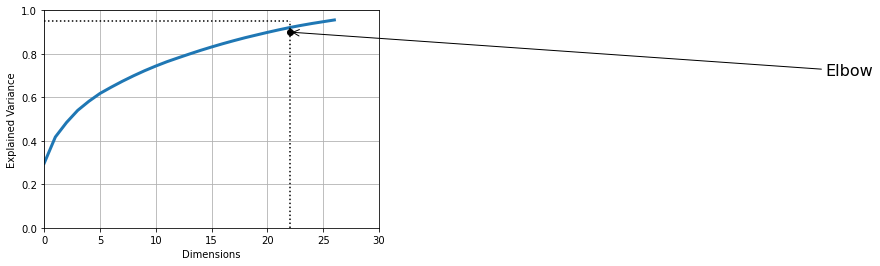

In [8]:
# Elbow plot from the book
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 30, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.90, "ko")
plt.annotate("Elbow", xy=(22, 0.90), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

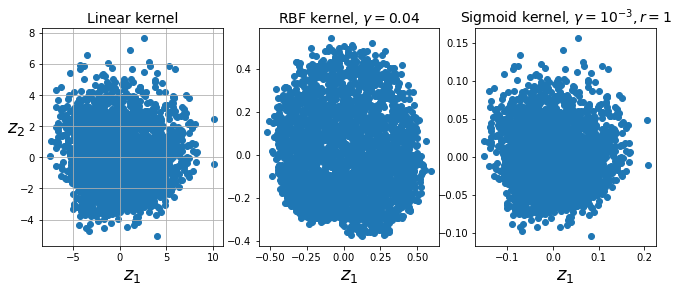

In [9]:
# Kernel PCA (from the book)
# Doesn't appear to have done much for this data set
from sklearn.decomposition import KernelPCA
lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 5, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)
plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), 
                            (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), 
                            (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):    
    X_reduced = pca.fit_transform(df2)    
    if subplot == 132:        
        X_reduced_rbf = X_reduced
    plt.subplot(subplot)    
    plt.title(title, fontsize=14)    
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1],  cmap=plt.cm.hot)    
    plt.xlabel("$z_1$", fontsize=18)    
    if subplot == 131:        
        plt.ylabel("$z_2$", fontsize=18, rotation=0)    
        plt.grid(True)
plt.show()

In [10]:
X_reduced_KPCA = rbf_pca.fit_transform(df2)

In [11]:
X_reduced_KPCA.shape

(2936, 5)

In [12]:
start_time = time.time()
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=5, n_neighbors=10)
X_reduced_LLE = lle.fit_transform(df2)
print(X_reduced_LLE)
end_time = time.time()
print("Total run time = %.3f seconds" %(end_time - start_time))

[[ 0.013 -0.005 -0.009  0.014 -0.006]
 [-0.002 -0.004 -0.023  0.01   0.005]
 [ 0.024  0.009  0.025  0.004  0.003]
 ...
 [-0.009  0.002 -0.004 -0.011  0.012]
 [-0.008 -0.004 -0.002 -0.021  0.   ]
 [-0.008 -0.009  0.002 -0.011  0.001]]
Total run time = 2.247 seconds


In [13]:
start_time = time.time()
from sklearn.manifold import Isomap
isomap = Isomap(n_components=5)
X_reduced_isomap = isomap.fit_transform(df2)
end_time = time.time()
print("Total run time = %.3f seconds" %(end_time - start_time))

Total run time = 4.919 seconds


In [14]:
X_reduced_isomap

array([[ 5.084,  2.598, -3.987,  0.029, -2.675],
       [-1.231, -2.067, -0.742, -3.242, -2.843],
       [14.055,  0.276,  1.515, -3.327, -0.204],
       ...,
       [-3.973,  2.139,  6.412,  6.362, -2.951],
       [-5.746,  2.724,  4.431,  5.837,  0.295],
       [-2.811,  4.612,  5.862,  5.258, -4.083]])

In [15]:
start_time = time.time()
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=123)
X_reduced_tsne = tsne.fit_transform(df2)
end_time = time.time()
print("Total run time = %.3f seconds" %(end_time - start_time))

Total run time = 31.478 seconds


In [16]:
X_reduced_tsne

array([[ -2.167,  -1.292,   6.131],
       [  0.847,   1.788,   0.728],
       [ -2.99 ,  -1.079,  20.217],
       ...,
       [ -0.598,  -8.807, -12.459],
       [  0.08 ,  -8.124, -10.904],
       [  1.621,  -9.895,  -8.122]], dtype=float32)

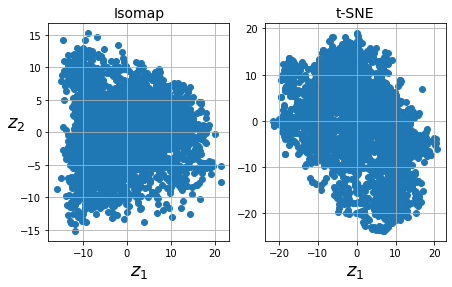

In [17]:
titles = ["Isomap", "t-SNE"]

plt.figure(figsize=(11,4))
for subplot, title, X_reduced in zip((131, 132), titles, (X_reduced_isomap, X_reduced_tsne)):    
    plt.subplot(subplot)    
    plt.title(title, fontsize=14)    
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], cmap=plt.cm.hot)    
    plt.xlabel("$z_1$", fontsize=18)    
    if subplot == 131:        
        plt.ylabel("$z_2$", fontsize=18, rotation=0)    
    plt.grid(True)

plt.show()

In [18]:
# NOTE: The package to install is NOT umap; it is umap-learn
import umap.umap_ as umap

In [19]:
start_time = time.time()
reducer = umap.UMAP()
X_reduced_UMAP = reducer.fit_transform(df2)
end_time = time.time()
print("Total run time = %.3f seconds" %(end_time - start_time))

Total run time = 15.596 seconds


In [20]:
X_reduced_UMAP.shape

(2936, 2)

In [21]:
X_reduced_UMAP

array([[5.563, 4.987],
       [3.855, 4.243],
       [8.028, 3.537],
       ...,
       [2.218, 3.552],
       [2.085, 3.941],
       [1.951, 6.318]], dtype=float32)

In [22]:
UMAP = pd.DataFrame(X_reduced_UMAP, columns =["UMAP_1", "UMAP_2"])
tsne = pd.DataFrame(X_reduced_tsne, columns = ["tSNE_1", "tSNE_2", "tSNE_3"])
LLE = pd.DataFrame(X_reduced_LLE, columns = ["LLE_1", "LLE_2", "LLE_3", "LLE_4", "LLE_5"])
isomap = pd.DataFrame(X_reduced_isomap, columns = ["ISO_1", "ISO_2", "ISO_3", "ISO_4", "ISO_5"])


In [23]:
colnames = []
for i in range(1,28):
    colnames.append("PCA_" + str(i))

PCA = pd.DataFrame(X_reduced_PCA, columns=colnames)


In [24]:
colnames = []
for i in range(1,6):
    colnames.append("KPCA_" + str(i))

KPCA = pd.DataFrame(X_reduced_KPCA, columns=colnames)
  


In [25]:
df.shape

(2936, 37)

In [26]:
all_reducers = [UMAP, tsne, LLE, isomap, PCA, KPCA]
names = ["UMAP", "tSNE", "LLE", "ISO", "PCA", "KPCA"]

merge_reducers = df.iloc[:,1:38]
for d in all_reducers:
    merge_reducers = merge_reducers.merge(d, left_index=True, right_index=True)

In [27]:
merge_reducers

,% Fair/Poor,Physically Unhealthy Days,Mentally Unhealthy Days,% LBW,% Smokers,% Obese,Food Environment Index,% Physically Inactive,% With Access,% Excessive Drinking,...,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27,KPCA_1,KPCA_2,KPCA_3,KPCA_4,KPCA_5
0,0.110673,0.389001,0.599601,-0.046100,0.308750,1.277396,-0.229372,1.012940,0.264421,-0.125322,...,-0.481046,-0.240688,-0.371637,0.652117,0.699318,-0.132018,0.363599,-0.123738,0.106349,-0.037946
1,0.110673,0.249076,0.436841,-0.046100,-0.236706,-0.244628,0.458913,-0.338015,0.394420,-0.125322,...,-0.406769,-0.059536,0.809419,0.089399,0.169469,0.246180,0.419125,0.156321,0.092020,0.142256
2,1.810044,1.648322,1.087881,1.410135,1.126935,2.581988,-1.605941,0.433959,-0.385571,-1.351040,...,-0.189757,-0.868413,-0.752074,1.537240,-0.456348,-0.205679,-0.279627,-0.014842,0.068824,-0.053751
3,0.535516,0.668850,0.599601,1.410135,0.581479,1.277396,0.114771,1.784914,-2.032219,-0.431752,...,0.028893,-0.841651,0.097173,0.774332,1.070303,-0.266423,-0.077086,-0.160396,0.128660,0.008361
4,0.747937,0.808775,1.250641,-0.046100,0.581479,0.407668,0.889091,0.626953,-1.728889,-0.738181,...,-0.742175,-0.145529,0.495365,0.184320,0.386771,-0.247346,-0.016945,-0.230469,0.145461,0.128077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2931,-0.526591,-0.590471,-0.702479,0.439311,0.036022,-0.462060,0.200806,0.047972,1.174411,0.793966,...,0.230015,-1.207619,-0.415898,-0.591420,0.150152,0.184417,0.151459,0.104925,-0.274727,0.138318
2932,-1.163856,-1.010245,-1.353519,-0.531512,-1.054890,-3.940972,0.717020,-2.653938,1.607739,0.793966,...,-0.152737,-0.507631,0.848361,-0.908310,0.096984,0.117462,-0.358105,0.084584,0.075831,0.097759
2933,-0.314170,-0.310622,-0.376959,0.924723,0.036022,-0.027196,-0.143336,-0.338015,0.784415,-0.431752,...,0.527725,-0.820403,-0.707358,-0.340325,0.278725,0.054405,0.073239,0.124047,-0.244896,0.150796
2934,-0.314170,-0.450546,-0.702479,-0.531512,-0.509434,-0.462060,0.630984,0.047972,0.827748,-0.431752,...,0.310322,-0.435807,-0.292278,-0.617108,0.176087,0.161703,0.041890,0.040106,-0.308521,0.051334


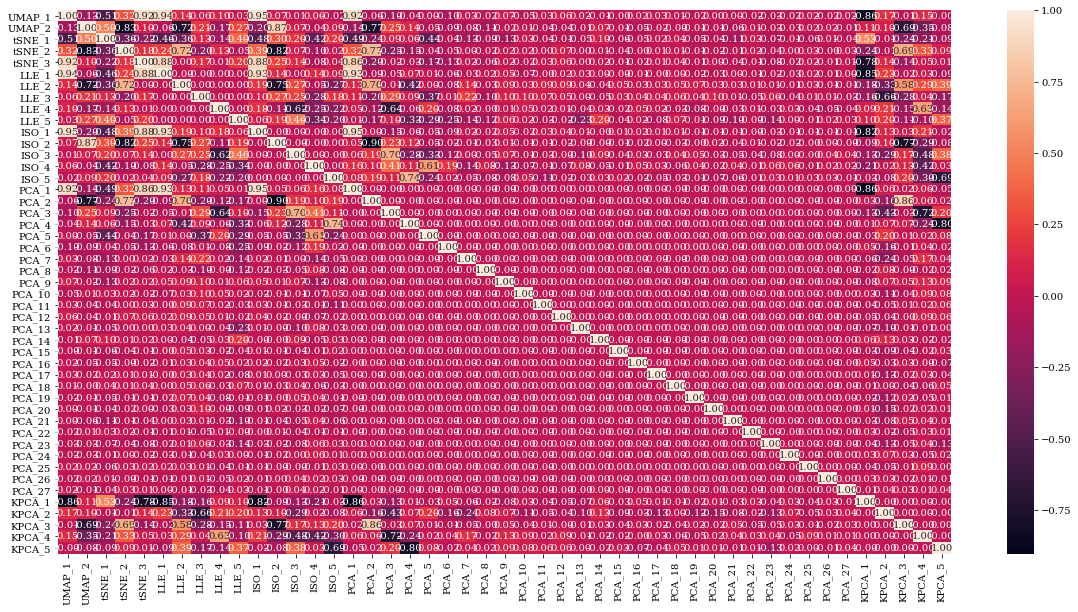

In [28]:
corrMatrix_embeddings = merge_reducers.iloc[:, 36:].corr()
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"


sb.heatmap(corrMatrix_embeddings, annot=True, cmap='rocket', fmt=".2f")
plt.show()

In [29]:
merge_reducers.shape

(2936, 83)

In [30]:
merge_reducers.head()

,% Fair/Poor,Physically Unhealthy Days,Mentally Unhealthy Days,% LBW,% Smokers,% Obese,Food Environment Index,% Physically Inactive,% With Access,% Excessive Drinking,...,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27,KPCA_1,KPCA_2,KPCA_3,KPCA_4,KPCA_5
0,0.110673,0.389001,0.599601,-0.046100,0.308750,1.277396,-0.229372,1.012940,0.264421,-0.125322,...,-0.481046,-0.240688,-0.371637,0.652117,0.699318,-0.132018,0.363599,-0.123738,0.106349,-0.037946
1,0.110673,0.249076,0.436841,-0.046100,-0.236706,-0.244628,0.458913,-0.338015,0.394420,-0.125322,...,-0.406769,-0.059536,0.809419,0.089399,0.169469,0.246180,0.419125,0.156321,0.092020,0.142256
2,1.810044,1.648322,1.087881,1.410135,1.126935,2.581988,-1.605941,0.433959,-0.385571,-1.351040,...,-0.189757,-0.868413,-0.752074,1.537240,-0.456348,-0.205679,-0.279627,-0.014842,0.068824,-0.053751
3,0.535516,0.668850,0.599601,1.410135,0.581479,1.277396,0.114771,1.784914,-2.032219,-0.431752,...,0.028893,-0.841651,0.097173,0.774332,1.070303,-0.266423,-0.077086,-0.160396,0.128660,0.008361
4,0.747937,0.808775,1.250641,-0.046100,0.581479,0.407668,0.889091,0.626953,-1.728889,-0.738181,...,-0.742175,-0.145529,0.495365,0.184320,0.386771,-0.247346,-0.016945,-0.230469,0.145461,0.128077


In [31]:
# Try kMeans clustering on each group of reducers
from sklearn.cluster import KMeans
k = 5

clusterdf = pd.DataFrame()
for i,j in enumerate(all_reducers):
    kmeans = KMeans(n_clusters=k)
    names[i] = kmeans.fit_predict(j)
    clusterdf[i] = names[i]


# Gving column names to cluster membership columns
colnames = ['KM_UMAP', 'KM_LLE', 'KM_tSNE', 'KM_ISO', 'KM_PCA', 'KM_KPCA']
clusterdf.columns = colnames

# Merging with the original dataset
merge_clusters = merge_reducers.iloc[:,0:83]
merge_clusters = merge_clusters.merge(clusterdf,  left_index=True, right_index=True)
merge_clusters.head()


,% Fair/Poor,Physically Unhealthy Days,Mentally Unhealthy Days,% LBW,% Smokers,% Obese,Food Environment Index,% Physically Inactive,% With Access,% Excessive Drinking,...,KPCA_2,KPCA_3,KPCA_4,KPCA_5,KM_UMAP,KM_LLE,KM_tSNE,KM_ISO,KM_PCA,KM_KPCA
0,0.110673,0.389001,0.599601,-0.046100,0.308750,1.277396,-0.229372,1.012940,0.264421,-0.125322,...,0.363599,-0.123738,0.106349,-0.037946,3,3,2,4,0,2
1,0.110673,0.249076,0.436841,-0.046100,-0.236706,-0.244628,0.458913,-0.338015,0.394420,-0.125322,...,0.419125,0.156321,0.092020,0.142256,4,1,2,4,3,2
2,1.810044,1.648322,1.087881,1.410135,1.126935,2.581988,-1.605941,0.433959,-0.385571,-1.351040,...,-0.279627,-0.014842,0.068824,-0.053751,0,4,4,1,4,1
3,0.535516,0.668850,0.599601,1.410135,0.581479,1.277396,0.114771,1.784914,-2.032219,-0.431752,...,-0.077086,-0.160396,0.128660,0.008361,0,3,4,1,0,3
4,0.747937,0.808775,1.250641,-0.046100,0.581479,0.407668,0.889091,0.626953,-1.728889,-0.738181,...,-0.016945,-0.230469,0.145461,0.128077,0,3,4,1,0,3


In [32]:
merge_clusters["FIPS"] = FIPS
merge_clusters["State"] = STATE
merge_clusters["County"] = COUNTY
# merge_clusters.info()

In [33]:
# Constrain population size to see groups more clearly

mc2 = merge_clusters[merge_clusters["Population"]<0.4]

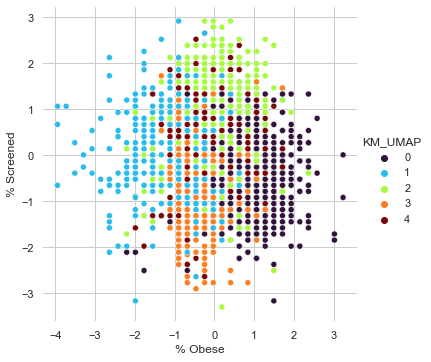

In [34]:
# Plot some clusters - Use 2 highly correlated opposing values to try to see group separation

sb.set_theme(style="whitegrid")
cmap = sb.color_palette("turbo", as_cmap=True)
g = sb.relplot(
    data=mc2,
    x="% Obese",
    y="% Screened",
    hue="KM_UMAP",
    palette=cmap
)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

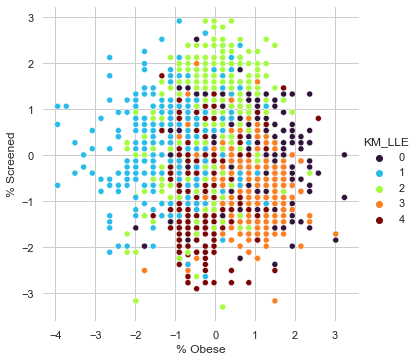

In [35]:
sb.set_theme(style="whitegrid")
cmap = sb.color_palette("turbo", as_cmap=True)
g = sb.relplot(
    data=mc2,
    x="% Obese",
    y="% Screened",
    hue="KM_LLE",
    palette=cmap
)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

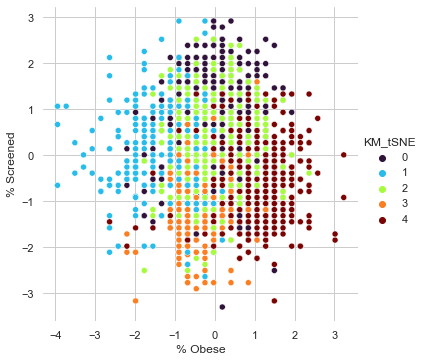

In [36]:
sb.set_theme(style="whitegrid")
cmap = sb.color_palette("turbo", as_cmap=True)
g = sb.relplot(
    data=mc2,
    x="% Obese",
    y="% Screened",
    hue="KM_tSNE",
    palette=cmap
)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

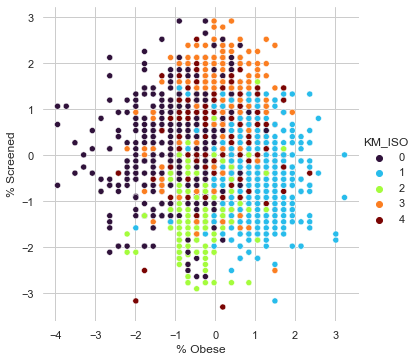

In [37]:
sb.set_theme(style="whitegrid")
cmap = sb.color_palette("turbo", as_cmap=True)
g = sb.relplot(
    data=mc2,
    x="% Obese",
    y="% Screened",
    hue="KM_ISO",
    palette=cmap
)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

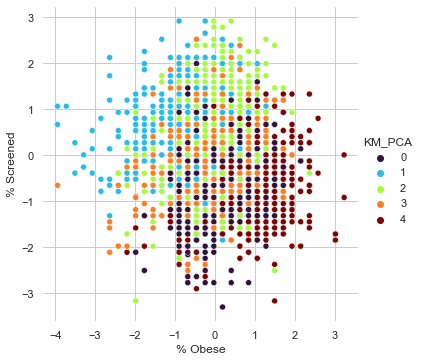

In [38]:
sb.set_theme(style="whitegrid")
cmap = sb.color_palette("turbo", as_cmap=True)
g = sb.relplot(
    data=mc2,
    x="% Obese",
    y="% Screened",
    hue="KM_PCA",
    palette=cmap
)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

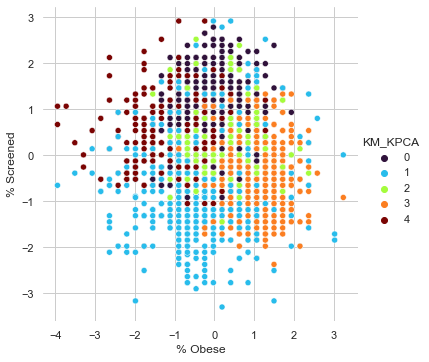

In [39]:
sb.set_theme(style="whitegrid")
cmap = sb.color_palette("turbo", as_cmap=True)
g = sb.relplot(
    data=mc2,
    x="% Obese",
    y="% Screened",
    hue="KM_KPCA",
    palette=cmap
)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [40]:
merge_clusters.shape

(2936, 92)

In [41]:
# Try DBSCAN clustering on each group of reducers
from sklearn.cluster import DBSCAN

dbscandf = pd.DataFrame()
for i,j in enumerate(all_reducers):
    dbscan = DBSCAN(eps=3, min_samples=2)
    names[i] = dbscan.fit(j).labels_
    dbscandf[i] = names[i]


# Gving column names to cluster membership columns
colnames_db = ['DB_UMAP', 'DB_LLE', 'DB_tSNE', 'DB_ISO', 'DB_PCA', 'DB_KPCA']
dbscandf.columns = colnames_db

# Merging with the original dataset
merge_clusters2 = merge_clusters.iloc[:,0:92]
merge_clusters2 = merge_clusters2.merge(dbscandf,  left_index=True, right_index=True)
merge_clusters2.head()

,% Fair/Poor,Physically Unhealthy Days,Mentally Unhealthy Days,% LBW,% Smokers,% Obese,Food Environment Index,% Physically Inactive,% With Access,% Excessive Drinking,...,KM_KPCA,FIPS,State,County,DB_UMAP,DB_LLE,DB_tSNE,DB_ISO,DB_PCA,DB_KPCA
0,0.110673,0.389001,0.599601,-0.046100,0.308750,1.277396,-0.229372,1.012940,0.264421,-0.125322,...,2,1001,Alabama,Autauga,0,0,0,0,0,0
1,0.110673,0.249076,0.436841,-0.046100,-0.236706,-0.244628,0.458913,-0.338015,0.394420,-0.125322,...,2,1003,Alabama,Baldwin,0,0,0,0,0,0
2,1.810044,1.648322,1.087881,1.410135,1.126935,2.581988,-1.605941,0.433959,-0.385571,-1.351040,...,1,1005,Alabama,Barbour,0,0,0,0,-1,0
3,0.535516,0.668850,0.599601,1.410135,0.581479,1.277396,0.114771,1.784914,-2.032219,-0.431752,...,3,1007,Alabama,Bibb,0,0,0,0,-1,0
4,0.747937,0.808775,1.250641,-0.046100,0.581479,0.407668,0.889091,0.626953,-1.728889,-0.738181,...,3,1009,Alabama,Blount,0,0,0,0,-1,0


In [42]:
# Constrain population size to see groups more clearly

mc3 = merge_clusters2[merge_clusters2["Population"]<0.4]

In [43]:
mc3.shape

(2703, 98)

In [44]:
#DB Scan did not work with UMAP, LLE, KPCA or tSNE
#ISO translated into far too many clusters
dbscandf.value_counts()

DB_UMAP  DB_LLE  DB_tSNE  DB_ISO  DB_PCA  DB_KPCA
0        0       0         0       0      0          1559
                                  -1      0           905
                          -1      -1      0           184
                                   0      0            21
                           14      0      0             8
                                                     ... 
                           32      36     0             1
                           38     -1      0             1
                           10      0      0             1
                           0       18     0             1
                           11     -1      0             1
Length: 132, dtype: int64

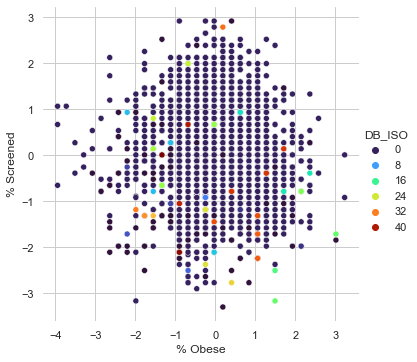

In [45]:
# Plot some DB clusters
sb.set_theme(style="whitegrid")
cmap = sb.color_palette("turbo", as_cmap=True)
g = sb.relplot(
    data=mc3,
    x="% Obese",
    y="% Screened",
    hue="DB_ISO",
    palette=cmap
)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

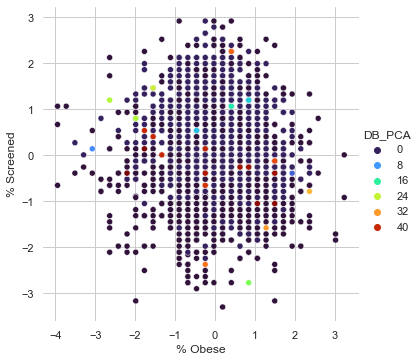

In [46]:
sb.set_theme(style="whitegrid")
cmap = sb.color_palette("turbo", as_cmap=True)
g = sb.relplot(
    data=mc3,
    x="% Obese",
    y="% Screened",
    hue="DB_PCA",
    palette=cmap
)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [47]:
merge_clusters.to_csv("FIPS_Counties_Clustered.csv")